In [ ]:
#Car Price Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv("/content/cardata.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [11]:
carcompany=[]
for i in df['Car_Name']:
  carcompany.append(str(i.split(' ')[0]))

In [12]:
carcompany

['ritz',
 'sx4',
 'ciaz',
 'wagon',
 'swift',
 'vitara',
 'ciaz',
 's',
 'ciaz',
 'ciaz',
 'alto',
 'ciaz',
 'ciaz',
 'ertiga',
 'dzire',
 'ertiga',
 'ertiga',
 'ertiga',
 'wagon',
 'sx4',
 'alto',
 'ignis',
 'sx4',
 'alto',
 'wagon',
 'swift',
 'swift',
 'swift',
 'alto',
 'ciaz',
 'ritz',
 'ritz',
 'swift',
 'ertiga',
 'dzire',
 'sx4',
 'dzire',
 '800',
 'alto',
 'sx4',
 'baleno',
 'alto',
 'sx4',
 'dzire',
 'omni',
 'ciaz',
 'ritz',
 'wagon',
 'ertiga',
 'ciaz',
 'fortuner',
 'fortuner',
 'innova',
 'fortuner',
 'innova',
 'corolla',
 'etios',
 'corolla',
 'etios',
 'fortuner',
 'corolla',
 'etios',
 'fortuner',
 'fortuner',
 'fortuner',
 'etios',
 'innova',
 'fortuner',
 'corolla',
 'corolla',
 'etios',
 'corolla',
 'corolla',
 'etios',
 'etios',
 'etios',
 'corolla',
 'corolla',
 'corolla',
 'fortuner',
 'corolla',
 'etios',
 'innova',
 'innova',
 'innova',
 'camry',
 'land',
 'corolla',
 'etios',
 'etios',
 'corolla',
 'innova',
 'innova',
 'fortuner',
 'corolla',
 'corolla',
 'i

In [13]:
df['carcompany']=np.array(carcompany)

<ipython-input-15-83f8d2b7c6eb>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby(['carcompany']).median()['Selling_Price'])


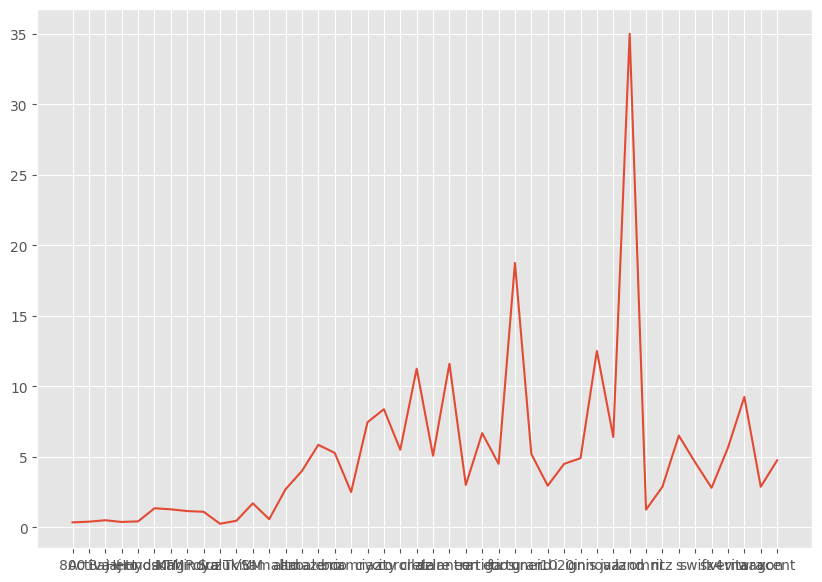

In [15]:
with plt.style.context(('ggplot')):
  plt.figure(figsize=(10,7))
  plt.plot(df.groupby(['carcompany']).median()['Selling_Price'])
  plt.show()

In [17]:
df.CarName=df.Car_Name.astype('category').cat.codes
df.head()


<ipython-input-17-b49031fd5324>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.CarName=df.Car_Name.astype('category').cat.codes


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,carcompany
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift


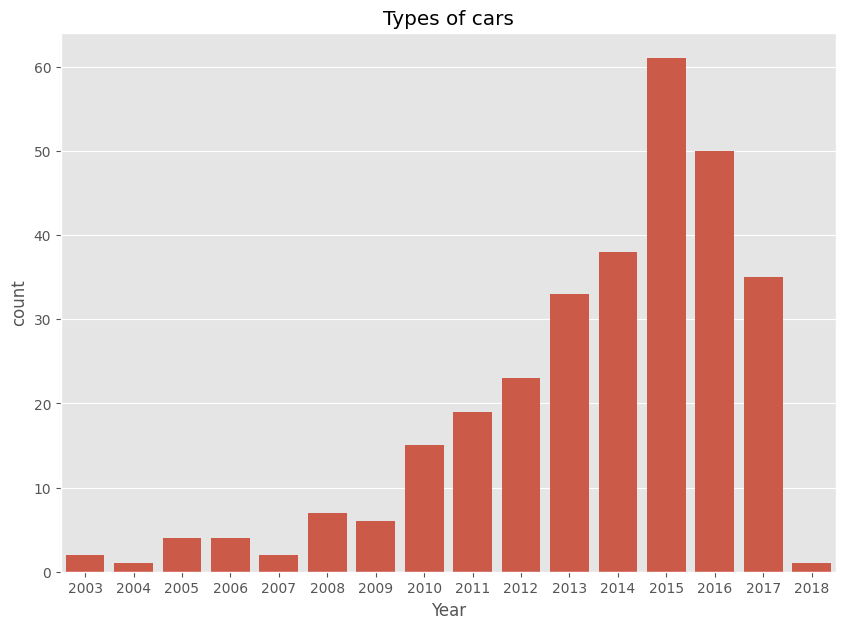

In [18]:
with plt.style.context(('ggplot')):
  plt.figure(figsize=(10,7))
  plt.title("Types of cars")
  sns.countplot(data=df,x=df['Year'])
  plt.show()

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,carcompany
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift


In [21]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
carcompany        object
dtype: object

In [22]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [ ]:
#Model Building

In [23]:
x = df.drop(["Selling_Price"], axis=1)
y = df["Selling_Price"]

In [24]:
x.head(n=5)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,carcompany
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,swift


In [25]:
y.head(n=5)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
x.shape

(301, 9)

In [27]:
y.shape

(301,)

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [30]:
X = df.drop(['Transmission'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
with plt.style.context(('ggplot')):
  plt.figure(figsize=(15,7))
  if 'linear_model' in model.named_steps:
    plt.plot(X.columns[:10],model.named_steps['linear_model'].coef_[:10])

<Figure size 1500x700 with 0 Axes>

In [ ]:
print("The Model Developed successfully")

The Model Developed successfully
